In [1]:
import pandas as pd 
import numpy as np 

import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer  
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder, StandardScaler 
from sklearn.model_selection import cross_validate,GridSearchCV 

In [2]:
train= pd.read_csv('train.csv',index_col="PassengerId")
test = pd.read_csv('test.csv',index_col="PassengerId")

In [3]:
df_combined= pd.concat([train, test])

In [4]:
train

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [5]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    float64
 1   Pclass    1309 non-null   int64  
 2   Name      1309 non-null   object 
 3   Sex       1309 non-null   object 
 4   Age       1046 non-null   float64
 5   SibSp     1309 non-null   int64  
 6   Parch     1309 non-null   int64  
 7   Ticket    1309 non-null   object 
 8   Fare      1308 non-null   float64
 9   Cabin     295 non-null    object 
 10  Embarked  1307 non-null   object 
dtypes: float64(3), int64(3), object(5)
memory usage: 122.7+ KB


In [6]:
train.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       332 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      417 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 35.9+ KB


In [8]:
train.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
test.describe()

,Pclass,Age,SibSp,Parch,Fare
count,418.000000,332.000000,418.000000,418.000000,417.000000
mean,2.265550,30.272590,0.447368,0.392344,35.627188
std,0.841838,14.181209,0.896760,0.981429,55.907576
min,1.000000,0.170000,0.000000,0.000000,0.000000
25%,1.000000,21.000000,0.000000,0.000000,7.895800
50%,3.000000,27.000000,0.000000,0.000000,14.454200
75%,3.000000,39.000000,1.000000,0.000000,31.500000
max,3.000000,76.000000,8.000000,9.000000,512.329200


In [10]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    float64
 1   Pclass    1309 non-null   int64  
 2   Name      1309 non-null   object 
 3   Sex       1309 non-null   object 
 4   Age       1046 non-null   float64
 5   SibSp     1309 non-null   int64  
 6   Parch     1309 non-null   int64  
 7   Ticket    1309 non-null   object 
 8   Fare      1308 non-null   float64
 9   Cabin     295 non-null    object 
 10  Embarked  1307 non-null   object 
dtypes: float64(3), int64(3), object(5)
memory usage: 122.7+ KB


In [11]:
train.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [12]:
test.isna().sum()

Pclass        0
Name          0
Sex           0
Age          86
SibSp         0
Parch         0
Ticket        0
Fare          1
Cabin       327
Embarked      0
dtype: int64

In [13]:
df_combined.isna().sum()

Survived     418
Pclass         0
Name           0
Sex            0
Age          263
SibSp          0
Parch          0
Ticket         0
Fare           1
Cabin       1014
Embarked       2
dtype: int64

In [14]:
train= train.drop(['Cabin'], axis=1)

In [15]:
test= test.drop(['Cabin'], axis=1)

In [16]:
df_combined=df_combined.drop(['Cabin'], axis=1)

In [17]:
train['Age'].fillna((df_combined['Age'].mean()), inplace=True)

In [18]:
test['Age'].fillna((df_combined['Age'].mean()), inplace=True)

In [19]:
df_combined['Age'].fillna((df_combined['Age'].mean()), inplace=True)

In [20]:
duplicate = train[train.duplicated()]
duplicate.size

0

In [21]:
duplicate = test[test.duplicated()]
duplicate.size

0

In [24]:
train['Age'].value_counts(bins=5, sort=False)

(0.339, 16.336]     100
(16.336, 32.252]    523
(32.252, 48.168]    188
(48.168, 64.084]     69
(64.084, 80.0]       11
Name: Age, dtype: int64

In [31]:
train['Age'].fillna((train['Age'].mean()), inplace=True) # fill the columns that do with nan values with mean age number 

bins = [0, 13, 26,40,53,66,80]
names = ['<13', '13-26', '26-40', '40-53', '53-66','66-80']

train['AgeCategory'] = pd.cut(train['Age'], bins, labels=names)

NumberedAgeCategories = {'<13':0 , '13-26':1, '26-40':2, '40-53':3, '53-66':4,'66-80':5 }
train['AgeCategory']=train['AgeCategory'].map(NumberedAgeCategories)  
train['AgeCategory']=pd.to_numeric(train['AgeCategory'])
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,AgeCategory
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,2
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,2
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,2


In [34]:
# Dealing with Outliers

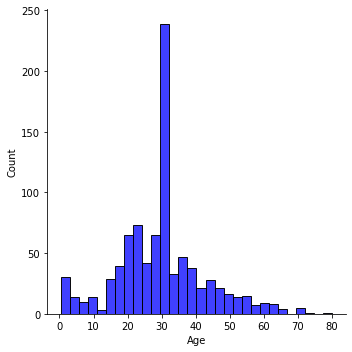

In [35]:
g = sns.displot(train["Age"], color="b", label="Skewness : %.2f"%(train["Age"].skew()))

In [36]:
outliers = train[train['Age']>75]['Age']
outliers

PassengerId
631    80.0
Name: Age, dtype: float64

In [32]:
train.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare,AgeCategory
Survived,1.000000,-0.338481,-0.070323,-0.035322,0.081629,0.257307,-0.071179
Pclass,-0.338481,1.000000,-0.330367,0.083081,0.018443,-0.549500,-0.298635
Age,-0.070323,-0.330367,1.000000,-0.232515,-0.179882,0.091002,0.962274
SibSp,-0.035322,0.083081,-0.232515,1.000000,0.414838,0.159651,-0.221954
Parch,0.081629,0.018443,-0.179882,0.414838,1.000000,0.216225,-0.189401
Fare,0.257307,-0.549500,0.091002,0.159651,0.216225,1.000000,0.067538
AgeCategory,-0.071179,-0.298635,0.962274,-0.221954,-0.189401,0.067538,1.000000


<AxesSubplot:>

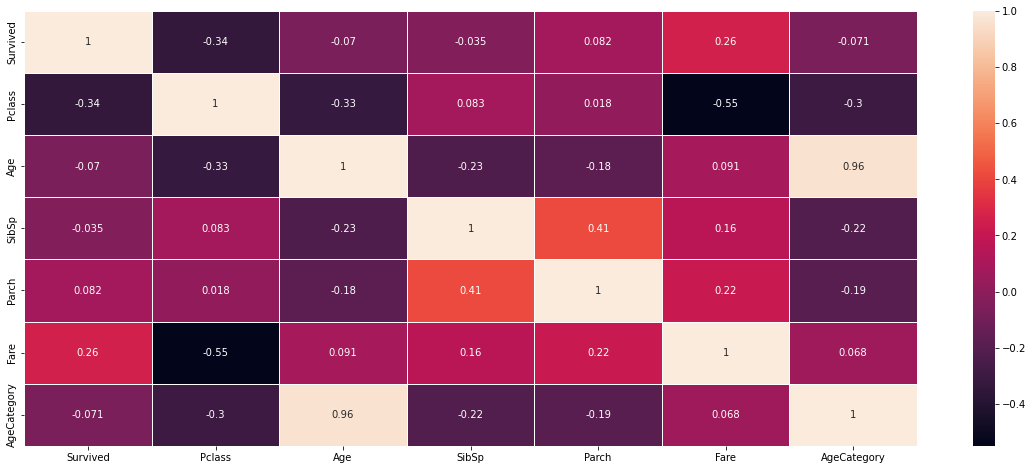

In [33]:
corr = train.corr()
f, ax = plt.subplots(figsize=(20, 8))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr,linewidths=.5, annot= True)